# Reddit Subreddit Classifier

If you're running this on Google Colab, upload following files to Google Colab:

app.ipynb, model.pkl, requirements.txt, config.py 
Also add folder "data" and upload following files: data/reddit.csv, data/ratings.csv

Then run the following code in the notebook.
``` python
!pip install -r requirements.txt 
!pip install praw

```	
Then continue with the rest of the code by running each cell one by one or by running all cells at once.
If you run all cells at once, you will train two models but this shouldn't take too long. You can also skip the training and run the cell to load the model from disk.

##  Data Collecting: Fetching Reddit Posts with an API call

In [33]:
import praw
import pandas as pd
import time
import os
import config 

#Initialize a Reddit "instance" with your own credentials
reddit = praw.Reddit(client_id=config.client_id,
                     client_secret=config.client_secret,
                     user_agent=config.user_agent)

#List of subreddits
subreddits = ['AskReddit', 'gaming', 'aww', 'movies', 'Showerthoughts', 'Jokes', 'science', 'books', 'Music', 'LifeProTips']

#List to hold all posts
posts = []

#Check if the CSV file already exists and is not empty and load it
#Please be careful with fetching new data as you might hit the API limit. Preferably, use the CSV file provided in the repo
if os.path.exists('data/reddit.csv') and os.path.getsize('data/reddit.csv') > 0:
    posts = pd.read_csv('data/reddit.csv', na_filter=False)

else:
        for sub in subreddits:
            subreddit = reddit.subreddit(sub)
            
            successful_posts = 0

            try:    
                #Get the top posts from each subreddit
                for submission in subreddit.hot(limit=None):
                    if len(submission.title) >= 20:
                        selftext = submission.selftext if submission.selftext else ''
                        #Append title, selftext, subreddit, score, time created,and ratio of upvotes to downvotes
                        posts.append([submission.title, selftext, sub, submission.score, submission.created_utc, submission.upvote_ratio])
                        successful_posts += 1

                        if successful_posts == 400:  #Stop after 400 successful posts
                            break
                print(f'Successfully fetched posts from {sub}')
            except Exception as e:
                print(f'Failed to fetch posts from {sub}')
            time.sleep(1)  #Sleep for 1 second after each API call

            if len(posts) >= 4000 :  #Stop after 4000 successful posts in total
                break

        #Create a DataFrame
        posts = pd.DataFrame(posts, columns=['title', 'content', 'subreddit', 'score', 'created_utc', 'upvote_ratio'])

        #Replace NaN values with empty strings
        posts = posts.fillna('')

        #Save to CSV
        posts.to_csv('data/reddit.csv', index=False)



## Data Analysis and Cleaning

In [2]:
display(posts.head(30))
#Count the number of posts in each subreddit
posts['subreddit'].value_counts()

,title,content,subreddit,score,created_utc,upvote_ratio
0,What's an unspoken rule on a first date?,,AskReddit,2538,1.685430e+09,0.94
1,What book should everyone read once in their l...,,AskReddit,2579,1.685398e+09,0.94
2,What was the most disappointing movie you paid...,,AskReddit,3042,1.685393e+09,0.95
3,"Whats something attractive people can do, that...",,AskReddit,17014,1.685371e+09,0.88
4,What actor or actress ruins a movie for you?,,AskReddit,5212,1.685382e+09,0.91
5,What's a song that is so beautiful that it mak...,,AskReddit,1605,1.685400e+09,0.95
6,"Guys, how do we know if you are flirting or ju...",,AskReddit,4086,1.685382e+09,0.93
7,"What are some ""girl secrets"" guys don't know a...",,AskReddit,24864,1.685359e+09,0.81
8,Which cheap and mass-produced item is stupendo...,,AskReddit,1277,1.685387e+09,0.96
9,What is something that old people love that yo...,,AskReddit,48,1.685447e+09,0.91


subreddit
AskReddit         400
aww               400
Jokes             400
science           400
Music             400
LifeProTips       400
movies            378
books             342
Showerthoughts    302
gaming            194
Name: count, dtype: int64

In [3]:
#Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [4]:
#Analysing the data
#Remove rows with empty text
temp_posts = posts

#Check the first few rows of the DataFrame
print(temp_posts.head())

#Check the dimensions of the DataFrame
print(temp_posts.shape)

#Check summary statistics
print(temp_posts.describe(include='all'))

#Check for missing values
print(temp_posts.isnull().sum())


                                               title content  subreddit  \
0           What's an unspoken rule on a first date?          AskReddit   
1  What book should everyone read once in their l...          AskReddit   
2  What was the most disappointing movie you paid...          AskReddit   
3  Whats something attractive people can do, that...          AskReddit   
4       What actor or actress ruins a movie for you?          AskReddit   

   score   created_utc  upvote_ratio  
0   2538  1.685430e+09          0.94  
1   2579  1.685398e+09          0.94  
2   3042  1.685393e+09          0.95  
3  17014  1.685371e+09          0.88  
4   5212  1.685382e+09          0.91  
(3616, 6)
                                                    title content  subreddit  \
count                                                3616    3616       3616   
unique                                               3577    1635         10   
top     What’s something about you that you feel other...        

subreddit
AskReddit         400
aww               400
Jokes             400
science           400
Music             400
LifeProTips       400
movies            378
books             342
Showerthoughts    302
gaming            194
Name: count, dtype: int64


,title,content,subreddit,score,created_utc,upvote_ratio
400,Making Friends Monday! Share your game tags here!,Use this post to look for new friends to game ...,gaming,2,1.685340e+09,0.60
401,I think I have a problem 😅,Didn’t realize how much of a completionist I w...,gaming,5615,1.685426e+09,0.90
404,"After all these Years, I finally have him",Father & Son bonding,gaming,3443,1.685387e+09,0.96
410,Warning to console RTS fans - Dont buy Company...,Hello console RTS fans!\n\nIt has come to my a...,gaming,528,1.685390e+09,0.88
411,"Well, time to get dysentery.","For $10 on Amazon, how could I not. Color scre...",gaming,336,1.685396e+09,0.91
412,I sculpted a Bullsquid from Half Life,Check out my Instagram bailer_86 for more pict...,gaming,461,1.685389e+09,0.92
415,You can't miss this one! 350 in 1 PNES!,All the classic Nintendo games on your PS1 wit...,gaming,155,1.685392e+09,0.86
417,That one game that made you buy a console,Which was it ? I remember buying a PS3 for InF...,gaming,139,1.685385e+09,0.81
418,Is there a game featuring a system similar to ...,"Warner bros got a patent for it, but isn't doi...",gaming,10,1.685439e+09,0.74
419,Give me some motivation because I am shit scared,Ah no shit fuck,gaming,31890,1.685297e+09,0.86


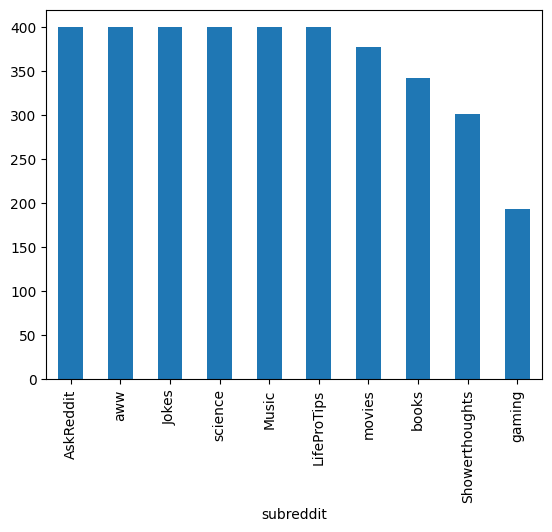

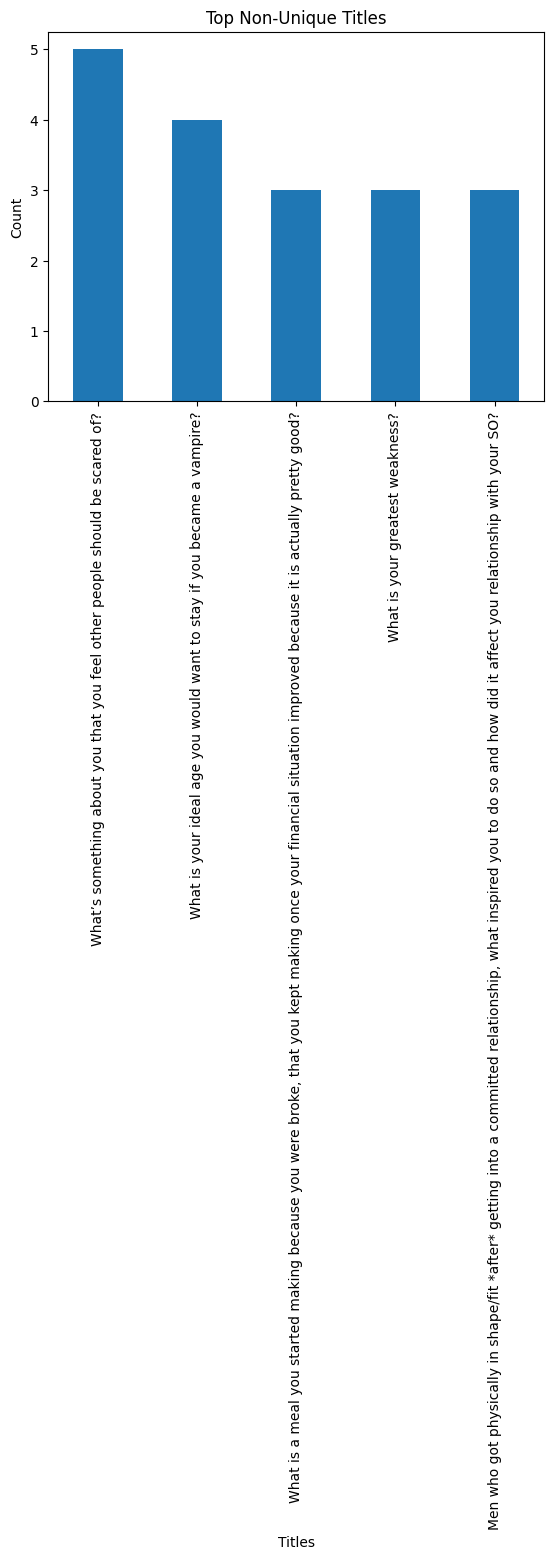

In [5]:
#Count unique values in the subreddit column
print(temp_posts['subreddit'].value_counts())

#Display temp_posts.head(30) where content is not empty
display(temp_posts[temp_posts['content'] != ''].head(30))

#Visualize the distribution
temp_posts['subreddit'].value_counts().plot(kind='bar')
plt.show()

#Visualize titles which are not unique
title_counts = temp_posts['title'].value_counts()
non_unique_titles = title_counts[title_counts > 1]

#Display non unique titles
top_20_non_unique = non_unique_titles.head()

top_20_non_unique.plot(kind='bar')
plt.xlabel('Titles')
plt.ylabel('Count')
plt.title('Top Non-Unique Titles')
plt.xticks(rotation=90)
plt.show()

In [6]:
#Remove the entries were you find duplicate titles from the dataset
temp_posts.drop_duplicates(subset=['title'], inplace=True)

#Remove gaming subreddit from the dataset as it has the least number of posts
temp_posts = temp_posts[temp_posts['subreddit'] != 'gaming']

C:\Users\pemla\AppData\Local\Temp\ipykernel_10152\1059839570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_posts['title_length'] = temp_posts['title'].str.len()


subreddit
AskReddit          63.887978
Jokes              57.402010
LifeProTips       102.452500
Music              52.844612
Showerthoughts     80.225166
aww                48.400000
books              64.026316
movies             64.854497
science           162.771357
Name: title_length, dtype: float64
mean    77.764706
std     56.944080
Name: title_length, dtype: float64


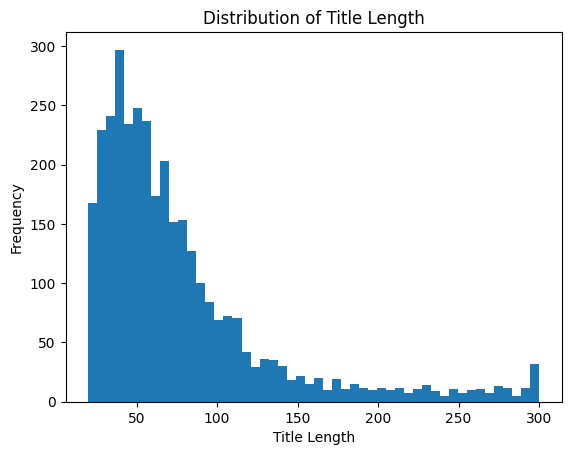

In [7]:
#Add a new column for title length
temp_posts['title_length'] = temp_posts['title'].str.len()

#Display average title length per subreddit
print(temp_posts.groupby('subreddit')['title_length'].mean())

#Display mean and standard deviation of title length
print(temp_posts['title_length'].agg(['mean', 'std']))

#Visualize the distribution of content length
plt.hist(temp_posts['title_length'], bins=50)
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Distribution of Title Length')
plt.show()

C:\Users\pemla\AppData\Local\Temp\ipykernel_10152\3863679274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_posts['content_length'] = temp_posts['content'].str.len()


subreddit
AskReddit           0.000000
Jokes             156.427136
LifeProTips       429.460000
Music             155.323308
Showerthoughts     22.976821
aww                16.037500
books             961.578947
movies            655.521164
science             0.000000
Name: content_length, dtype: float64
mean    261.902749
std     652.869412
Name: content_length, dtype: float64


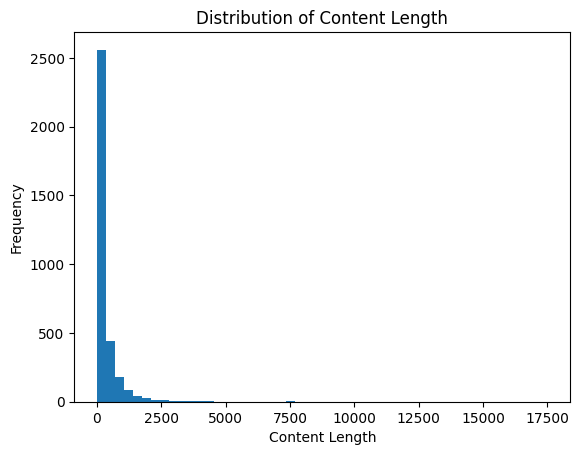

In [8]:
#Add a new column for title length
temp_posts['content_length'] = temp_posts['content'].str.len()

#Display average title length per subreddit
print(temp_posts.groupby('subreddit')['content_length'].mean())

#Display mean and standard deviation of title length
print(temp_posts['content_length'].agg(['mean', 'std']))

#Visualize the distribution of content length
plt.hist(temp_posts['content_length'], bins=50)
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.title('Distribution of Content Length')
plt.show()

In [9]:
#Count number of entries in subreddit "science" with a length over 70
print(temp_posts[(temp_posts['subreddit'] == 'science') & (temp_posts['title_length'] > 80)].shape)


(327, 8)


In [10]:
display(temp_posts.head())

,title,content,subreddit,score,created_utc,upvote_ratio,title_length,content_length
0,What's an unspoken rule on a first date?,,AskReddit,2538,1.685430e+09,0.94,40,0
1,What book should everyone read once in their l...,,AskReddit,2579,1.685398e+09,0.94,50,0
2,What was the most disappointing movie you paid...,,AskReddit,3042,1.685393e+09,0.95,54,0
3,"Whats something attractive people can do, that...",,AskReddit,17014,1.685371e+09,0.88,64,0
4,What actor or actress ruins a movie for you?,,AskReddit,5212,1.685382e+09,0.91,44,0


In [11]:
#Add column where title and content are combined
temp_posts['title_content'] = temp_posts['title'] + ' ' + temp_posts['content']
display(temp_posts.head())

C:\Users\pemla\AppData\Local\Temp\ipykernel_10152\606965529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_posts['title_content'] = temp_posts['title'] + ' ' + temp_posts['content']


,title,content,subreddit,score,created_utc,upvote_ratio,title_length,content_length,title_content
0,What's an unspoken rule on a first date?,,AskReddit,2538,1.685430e+09,0.94,40,0,What's an unspoken rule on a first date?
1,What book should everyone read once in their l...,,AskReddit,2579,1.685398e+09,0.94,50,0,What book should everyone read once in their l...
2,What was the most disappointing movie you paid...,,AskReddit,3042,1.685393e+09,0.95,54,0,What was the most disappointing movie you paid...
3,"Whats something attractive people can do, that...",,AskReddit,17014,1.685371e+09,0.88,64,0,"Whats something attractive people can do, that..."
4,What actor or actress ruins a movie for you?,,AskReddit,5212,1.685382e+09,0.91,44,0,What actor or actress ruins a movie for you?


In [12]:
#Display average length of title_content per subreddit
print(temp_posts.groupby('subreddit')['title_content'].apply(lambda x: x.str.len().mean()))

subreddit
AskReddit           64.887978
Jokes              214.829146
LifeProTips        532.912500
Music              209.167920
Showerthoughts     104.201987
aww                 65.437500
books             1026.605263
movies             721.375661
science            163.771357
Name: title_content, dtype: float64


In [13]:
#Count all non-string values present in the 'title_content' column 
print(temp_posts[~temp_posts['title_content'].apply(lambda x: isinstance(x, str))].shape)
print(temp_posts[~temp_posts['title_content'].apply(lambda x: isinstance(x, str))])

(0, 9)
Empty DataFrame
Columns: [title, content, subreddit, score, created_utc, upvote_ratio, title_length, content_length, title_content]
Index: []


## Data Preprocessing

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams

nltk.download('punkt')  #for tokenization
nltk.download('stopwords')  #for stopword removal
nltk.download('wordnet')  #for lemmatization

def preprocess_text(text):
    #tokenize the text into words
    words = word_tokenize(text)

    #lower the case and remove punctuation
    words = [word.lower() for word in words if word.isalpha()]

    #consider words that are at least 2 characters long (to include words like "it", "is", etc.)
    words = [word for word in words if len(word) > 1]

    #lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    #remove stopwords (customize this list as needed)
    stop_words = set(stopwords.words('english')) - {'what', 'why', "how", 'which', 'who', 'whom', 'when', 'where'}
    words = [word for word in words if word not in stop_words]

    #create bigrams and trigrams
    bigrams = [' '.join(gram) for gram in ngrams(words, 2)]
    trigrams = [' '.join(gram) for gram in ngrams(words, 3)]
    
    #add bigrams and trigrams to words list
    words.extend(bigrams)
    words.extend(trigrams)

    #join the preprocessed words back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

#Check for non-string values and convert to string
temp_posts['title_content'] = temp_posts['title_content'].astype(str)

#Apply preprocessing on the 'title_content' column of your existing DataFrame
temp_posts['preprocessed_title_content'] = temp_posts['title_content'].apply(preprocess_text)

#Print the preprocessed titles
print(temp_posts['preprocessed_title_content'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pemla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pemla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pemla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\pemla\AppData\Local\Temp\ipykernel_10152\1883554129.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_posts['title_content'] = temp_posts['title_content'].astype(str)


0       what unspoken rule first date what unspoken un...
1       what book everyone read life what book book ev...
2       what wa disappointing movie paid see what wa w...
3       whats something attractive people ugly people ...
4       what actor actress ruin movie what actor actor...
                              ...                        
3611    lpt write set pin number back credit card wron...
3612    lpt drive truck choose red totebags when hauli...
3613    lpt trade phone verizon verizon offered used g...
3614    lpt find continually dusting get air duct clea...
3615    lpt flat tire tool bicycle pump inflate tire s...
Name: preprocessed_title_content, Length: 3383, dtype: object


C:\Users\pemla\AppData\Local\Temp\ipykernel_10152\1883554129.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_posts['preprocessed_title_content'] = temp_posts['title_content'].apply(preprocess_text)


In [15]:
display(temp_posts.head())

#Add a new column for preprocessed_title_content length
temp_posts['preprocessed_title_content_length'] = temp_posts['preprocessed_title_content'].str.len()

#Display average preprocessed_title length per subreddit
print(temp_posts.groupby('subreddit')['preprocessed_title_content_length'].mean())

#Display mean and standard deviation of preprocessed_title length
print(temp_posts['preprocessed_title_content_length'].agg(['mean', 'std']))

,title,content,subreddit,score,created_utc,upvote_ratio,title_length,content_length,title_content,preprocessed_title_content
0,What's an unspoken rule on a first date?,,AskReddit,2538,1.685430e+09,0.94,40,0,What's an unspoken rule on a first date?,what unspoken rule first date what unspoken un...
1,What book should everyone read once in their l...,,AskReddit,2579,1.685398e+09,0.94,50,0,What book should everyone read once in their l...,what book everyone read life what book book ev...
2,What was the most disappointing movie you paid...,,AskReddit,3042,1.685393e+09,0.95,54,0,What was the most disappointing movie you paid...,what wa disappointing movie paid see what wa w...
3,"Whats something attractive people can do, that...",,AskReddit,17014,1.685371e+09,0.88,64,0,"Whats something attractive people can do, that...",whats something attractive people ugly people ...
4,What actor or actress ruins a movie for you?,,AskReddit,5212,1.685382e+09,0.91,44,0,What actor or actress ruins a movie for you?,what actor actress ruin movie what actor actor...


subreddit
AskReddit          195.508197
Jokes              703.736181
LifeProTips       1867.207500
Music              704.486216
Showerthoughts     338.652318
aww                204.617500
books             3678.757310
movies            2648.642857
science            660.381910
Name: preprocessed_title_content_length, dtype: float64
mean    1207.771209
std     2430.030117
Name: preprocessed_title_content_length, dtype: float64


C:\Users\pemla\AppData\Local\Temp\ipykernel_10152\2722022297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_posts['preprocessed_title_content_length'] = temp_posts['preprocessed_title_content'].str.len()


In [16]:
#Give each subreddit an ID and save it in a variable
subreddit_name_id = {subreddit: i for i, subreddit in enumerate(temp_posts['subreddit'].unique())}
#Print the subreddit_id
print(subreddit_name_id)    

{'AskReddit': 0, 'aww': 1, 'movies': 2, 'Showerthoughts': 3, 'Jokes': 4, 'science': 5, 'books': 6, 'Music': 7, 'LifeProTips': 8}


In [17]:
#Insert a subreddit ID column for each subreddit
temp_posts['subreddit_id'] = temp_posts['subreddit'].factorize()[0]
display(temp_posts.head())

C:\Users\pemla\AppData\Local\Temp\ipykernel_10152\2095745923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_posts['subreddit_id'] = temp_posts['subreddit'].factorize()[0]


,title,content,subreddit,score,created_utc,upvote_ratio,title_length,content_length,title_content,preprocessed_title_content,preprocessed_title_content_length,subreddit_id
0,What's an unspoken rule on a first date?,,AskReddit,2538,1.685430e+09,0.94,40,0,What's an unspoken rule on a first date?,what unspoken rule first date what unspoken un...,134,0
1,What book should everyone read once in their l...,,AskReddit,2579,1.685398e+09,0.94,50,0,What book should everyone read once in their l...,what book everyone read life what book book ev...,133,0
2,What was the most disappointing movie you paid...,,AskReddit,3042,1.685393e+09,0.95,54,0,What was the most disappointing movie you paid...,what wa disappointing movie paid see what wa w...,186,0
3,"Whats something attractive people can do, that...",,AskReddit,17014,1.685371e+09,0.88,64,0,"Whats something attractive people can do, that...",whats something attractive people ugly people ...,255,0
4,What actor or actress ruins a movie for you?,,AskReddit,5212,1.685382e+09,0.91,44,0,What actor or actress ruins a movie for you?,what actor actress ruin movie what actor actor...,135,0


In [18]:
from sklearn.utils import resample


In [19]:
#Display the number of entries in science and aww
print(temp_posts['subreddit'].value_counts())

subreddit
aww               400
LifeProTips       400
Music             399
Jokes             398
science           398
movies            378
AskReddit         366
books             342
Showerthoughts    302
Name: count, dtype: int64


# Training with feature extraction
This task was trained with a Naive Bayes and a SVC model. The SVC model performed better with an accuracy of 0.809 and an F1-score of 0.81 while the Naive Bayes model had an accuracy of 0.605 and an F1-score of 0.61. The SVC model was chosen as the best model and saved to disk for future use.

Scores for different kernels:
Sigmoid: 0.740
Linear: 0.805
RBF: 0.809
Poly: 0.667

## SVM Model
You can run the training which shouldn't take too long and will be done if you've run all of the cells. You can also skip the training and load the model from disk by running the cell below.

In [31]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#Separate features and labels
X = temp_posts[['preprocessed_title_content', 'upvote_ratio', 'created_utc', 'score']]
y = temp_posts['subreddit_id']

#Define preprocessing for numeric and text features
numeric_features = ['upvote_ratio', 'created_utc', 'score']
text_features = 'preprocessed_title_content'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('txt', TfidfVectorizer(), text_features)
    ])

#Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', SVC())
])

#Define the parameters for grid search
parameters = {
    #regularization parameter
    'clf__C': [0.1, 1, 10, 100],
    #parameter for the kernel function which defines the influence of each training example on the decision boundary.
    # Higher values of gamma result in a more complex decision boundary, which may lead to overfitting.
    'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    #trained with rbf, sigmoid, linear and poly. rbf performed best
    #different kernel functions can be used to transform the input data into a higher-dimensional space
    'clf__kernel': ['rbf']
}

#Apply Grid Search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model with grid search
grid_search.fit(X_train, y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

#Predict with the best estimator
predictions = grid_search.best_estimator_.predict(X_test)

print(classification_report(y_test, predictions))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best score: 0.795
Best parameters set:
	clf__C: 10
	clf__gamma: 0.1
	clf__kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        92
           1       0.78      0.86      0.82        86
           2       0.84      0.82      0.83        74
           3       0.58      0.62      0.60        60
           4       0.63      0.66      0.64        85
           5       0.90      0.84      0.87        64
           6       1.00      0.64      0.78        77
           7       0.79      0.83      0.81        66
           8       0.91      0.81      0.86        73

    accuracy                           0.79       677
   macro avg       0.80      0.78      0.79       677
weighted avg       0.80      0.79      0.79       677



In [21]:
import pickle

#Save the trained model if there is no previously saved model
if not os.path.exists('model.pkl'):
    with open('model.pkl', 'wb') as file:
        pickle.dump(grid_search.best_estimator_, file)
elif os.path.exists('model.pkl'):           
    #Load the saved model from file
    with open('model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)


## Naive Bayes Model 
You can run the training which shouldn't take too long and will be done if you've run all of the cells. You can also skip the training and load the model from disk by running the cell below.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn import metrics


#Initialize the TfidfVectorizer with best parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, ngram_range=(1, 2))

#Fit and transform the vectorizer on our corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(temp_posts['preprocessed_title_content'])

#Check the shape of the resulting matrix
print(tfidf_matrix.shape)

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, temp_posts['subreddit_id'], random_state=42)

#Initialize a Multinomial Naive Bayes classifier
clf = MultinomialNB(alpha=1)

#Train the classifier
clf.fit(X_train, y_train)

#Predict the test set results
y_pred = clf.predict(X_test)

#Calculate and print the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')

#Create a list of target_names sorted by subreddit_id
target_names = temp_posts.sort_values('subreddit_id')['subreddit'].unique().tolist()

print(classification_report(y_test, y_pred, target_names=target_names))

#Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

#Parameters for GridSearch
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__alpha': (0.1, 1, 1.5, 2),
}

#Perform GridSearch
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
grid_search.fit(temp_posts['preprocessed_title_content'], temp_posts['subreddit_id'])

#Print Best Score and Parameters
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

#Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(temp_posts['preprocessed_title_content'], temp_posts['subreddit_id'], random_state=42)

#Train the classifier with the best parameters on the training set
grid_search.best_estimator_.fit(X_train, y_train)

#Predict the classes on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

#Print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))


(3383, 191576)
Accuracy: 60.520094562647756%
                precision    recall  f1-score   support

     AskReddit       0.93      0.24      0.39       111
           aww       0.93      0.58      0.72       108
        movies       0.59      0.84      0.69        92
Showerthoughts       1.00      0.03      0.05        76
         Jokes       0.67      0.35      0.46       105
       science       0.78      0.91      0.84        77
         books       0.85      0.88      0.86        97
         Music       0.82      0.68      0.75        88
   LifeProTips       0.30      0.99      0.47        92

      accuracy                           0.61       846
     macro avg       0.76      0.61      0.58       846
  weighted avg       0.77      0.61      0.58       846

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: 0.690
Best parameters set:
	clf__alpha: 0.1
	tfidf__max_df: 0.5
	tfidf__ngram_range: (1, 1)
                precision    recall  f1-score   support

 

### Testing the model - Either test it in the notebook or run the main.py file by typing "python main.py" into the terminal

#### Testing on own dataset

In [23]:
import numpy as np

with open('model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
        
#Get random post from reddit.csv same way as scraping
random_post = temp_posts.sample()
random_subreddit = random_post[['subreddit']]
testing_post = random_post[['preprocessed_title_content', 'upvote_ratio', 'created_utc', 'score']]
print(testing_post)

#Use the loaded model to predict the subreddit ID
predicted_subreddit_id = loaded_model.predict(testing_post)

#Define the subreddit ID to name mapping (subreddit_name_id dictionary)
subreddit_id_name = {value: key for key, value in subreddit_name_id.items()}

#Get the predicted subreddit name from the subreddit_id_name mapping
predicted_subreddit_name = subreddit_id_name[predicted_subreddit_id[0]]  #Assuming only one prediction
random_subreddit_value = random_subreddit['subreddit'].values[0]

print(f"The post is from {random_subreddit_value}, the model predicted it as {predicted_subreddit_name}." "\n")
print("---------------------------------------------""\n")
if random_subreddit_value == predicted_subreddit_name:
    print("The model predicted correctly! - run the next cell")
else:
    print("The model predicted incorrectly! - try running the cell again until it predicts it correctly")



                             preprocessed_title_content  upvote_ratio  \
1852  two blonde walk bar neither saw two blonde blo...          0.44   

       created_utc  score  
1852  1.685299e+09      0  
The post is from Jokes, the model predicted it as Jokes.

---------------------------------------------

The model predicted correctly! - run the next cell


#### Testing on new reddit post

In [34]:
import numpy as np

#Define a variable to control the while loop
title_content_length = 0

#Fetch new posts until one is found with preprocessed_title_content length > 30
while title_content_length <= 30:
    #Get a random new post via API from a random subreddit in our list
    random_subreddit = np.random.choice(subreddits)
    new_submission = reddit.subreddit(random_subreddit).hot(limit=1)

    for submission in new_submission:
        new_post = pd.DataFrame({
            'title': [submission.title],
            'content': [submission.selftext],
            'upvote_ratio': [submission.upvote_ratio],
            'created_utc': [submission.created_utc],
            'score': [submission.score]
        })

    new_post['title_content'] = new_post['title'] + " " + new_post['content']
    clip_prompt = (new_post['title'] + " " + new_post['content']).values[0]
    new_post['preprocessed_title_content'] = new_post['title_content'].apply(preprocess_text)

    #Check the length of preprocessed_title_content
    title_content_length = len(new_post['preprocessed_title_content'][0])
    #sleep for 1 second
    time.sleep(1)
#Now that the post meets your criteria, you can continue processing it
new_post = new_post[['preprocessed_title_content', 'upvote_ratio', 'created_utc', 'score']]

display(new_post.head())

#Use the loaded model to predict the subreddit ID
predicted_subreddit_id = loaded_model.predict(new_post)

#Define the subreddit ID to name mapping (subreddit_name_id dictionary)
subreddit_id_name = {value: key for key, value in subreddit_name_id.items()}

#Get the predicted subreddit name from the subreddit_id_name mapping
predicted_subreddit_name = subreddit_id_name[predicted_subreddit_id[0]]  #Assuming only one prediction

print(f"The post is from {random_subreddit}, the model predicted it as {predicted_subreddit_name}." "\n")


#Printing the prediction
print("---------------------------------------------""\n")
if random_subreddit == predicted_subreddit_name:
    print("The model predicted correctly! - run the next cell")
else:
    print("The model predicted incorrectly! - try running the cell again until it predicts it correctly")


,preprocessed_title_content,upvote_ratio,created_utc,score
0,weekly recommendation thread june welcome week...,0.75,1.686305e+09,4


The post is from books, the model predicted it as AskReddit.

---------------------------------------------

The model predicted incorrectly! - try running the cell again until it predicts it correctly


### Image Creation - These steps are preferably to be run on Google Colab
You can create images of the title and the content of the post by running the following code in the notebook.

#### Upload following files to Google Colab:

app.ipynb, model.pkl, requirements.txt, config.py, data/reddit.csv, data/ratings.csv

Then run the following code in the notebook.

```python

In [25]:
#Make sure you're using GPU!
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
#Install requirements.txt, diffuser and transformers for the image task
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

You should consider upgrading via the 'C:\Users\pemla\Dropbox\Schule\Semester 6\ML2\PROJECT\myenv\Scripts\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 524.9/524.9 KB 4.1 MB/s eta 0:00:00
^C


You should consider upgrading via the 'C:\Users\pemla\Dropbox\Schule\Semester 6\ML2\PROJECT\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 53.1/53.1 KB 691.3 kB/s eta 0:00:00
     -------------------------------------- 219.1/219.1 KB 1.9 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

#load the model
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)  

In [ ]:
pipe = pipe.to("cuda") #move to GPU

In [ ]:
image = pipe(clip_prompt).images[0]  #

#You can save it to a file
image.save("image.png")

#You can also create a caption for the image with the title and the content of the post
caption = clip_prompt

print("Caption: ",caption)
#Or print the image in colab directly
image

#### Ofcourse the user can rate the picture so we have a validation of the model and its image creation
The rating can then be used to improve the model or the image creation in a later version of the app. The rating is going to be saved in a rating.csv file.

In [ ]:
rating = input("Please enter a rating for this image (1-5): ")

#If rating is not between 1 and 5, ask again
while not rating.isdigit() or int(rating) not in range(1, 6):
    rating = input("Invalid rating. Please enter a rating between 1 and 5: ")

#Check if the CSV file exists
csv_exists = os.path.exists('data/ratings.csv')

#Save the prompt, rating, and image name to a CSV file
df = pd.DataFrame({
    'Subreddit': [random_subreddit],
    'Caption': [caption],
    'Rating': [rating]
})

#Determine the mode for writing to the CSV file
mode = 'w' if not csv_exists else 'a'

df.to_csv('data/ratings.csv', index=False, mode=mode, header=not csv_exists)


In [ ]:
#Read the ratings.csv file and display the average rating for each subreddit to determine if there are any subreddits that are consistently rated higher or lower than others
ratings = pd.read_csv('data/ratings.csv', na_filter=False)
average_ratings = ratings.groupby('Subreddit')['Rating'].mean()
display(average_ratings)
